# Lab 5
# Jevin Lim and Tate Woodward
# lim 4924 and wood3999

1. a. Upload a high quality .jpg file and create a numpy array (this will be the matrix $M$) for the grayscale image. 

$\hspace{3.5ex}$b. How many entries are in $M$?

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

im = cv2.imread("monke.jpg") 
M = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) 
print('The number of entries in M is ', M.shape[0] * M.shape[1], '.', sep='')

The number of entries in M is 1920000.


2. a. Use SVD to obtain a rank 100 approximation of $M$ and show the original image and the approximation.

$\hspace{3ex}$ b. How many entries do you need to keep (from $U$, $\Sigma$, $V$) to compute this approximation?

$\hspace{3ex}$ c. What percentage of the original information do you need to compute this approximation?

using first  100  singular values: 280100  entries kept.
Percentage of orgininal information: 14.588541666666666%


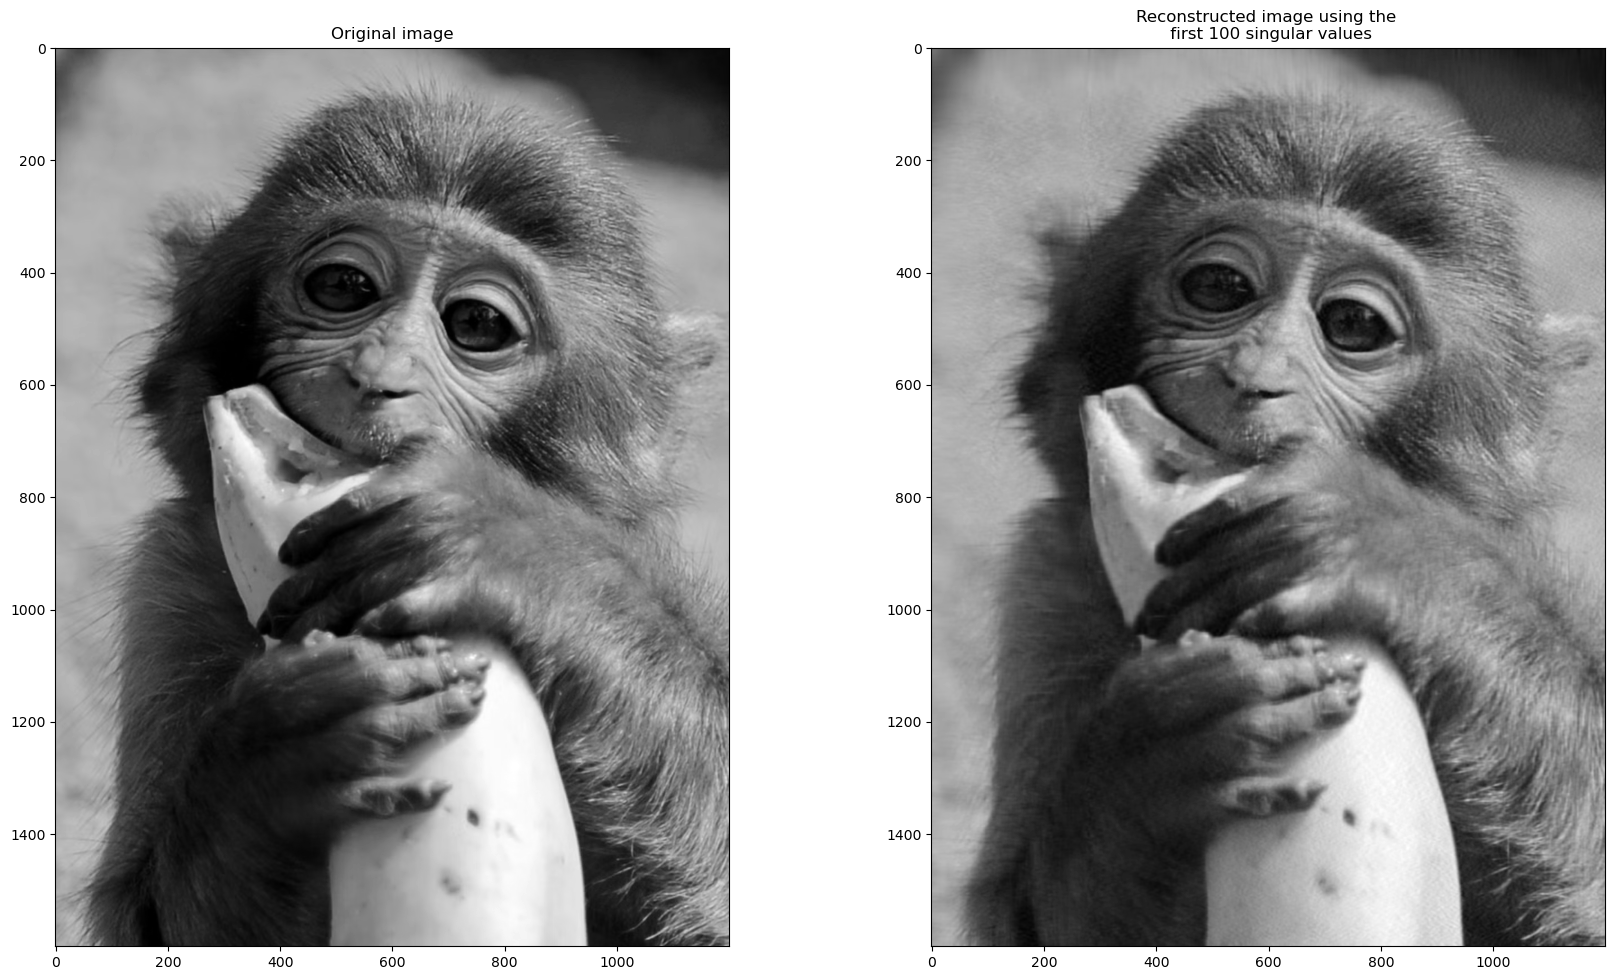

In [69]:
U, s, VT = np.linalg.svd(M)
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

k = 100
M_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

# Doing the 'Computer Science Way'
x = M.shape[0]
y = M.shape[1]

print('using first ', k, ' singular values:', k*(1 + x + y), ' entries kept.')
percentage = (k*(1 + x + y))/(x*y)
print('Percentage of orgininal information: ',percentage*100, '%', sep='')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(M, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(M_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()

3. a. What rank approximation would you use if you wanted to use 3% of the original information?

$\hspace{3ex}$ b. Show the original image and this approximation.

57600.0
Rank approximation using 3% of original information =  21
 
original matrix: 1600 X 1200 =  1920000  entries.
using first  21  singular values: 58821  entries.
Percentage of orgininal information: 3.0635937500000003%


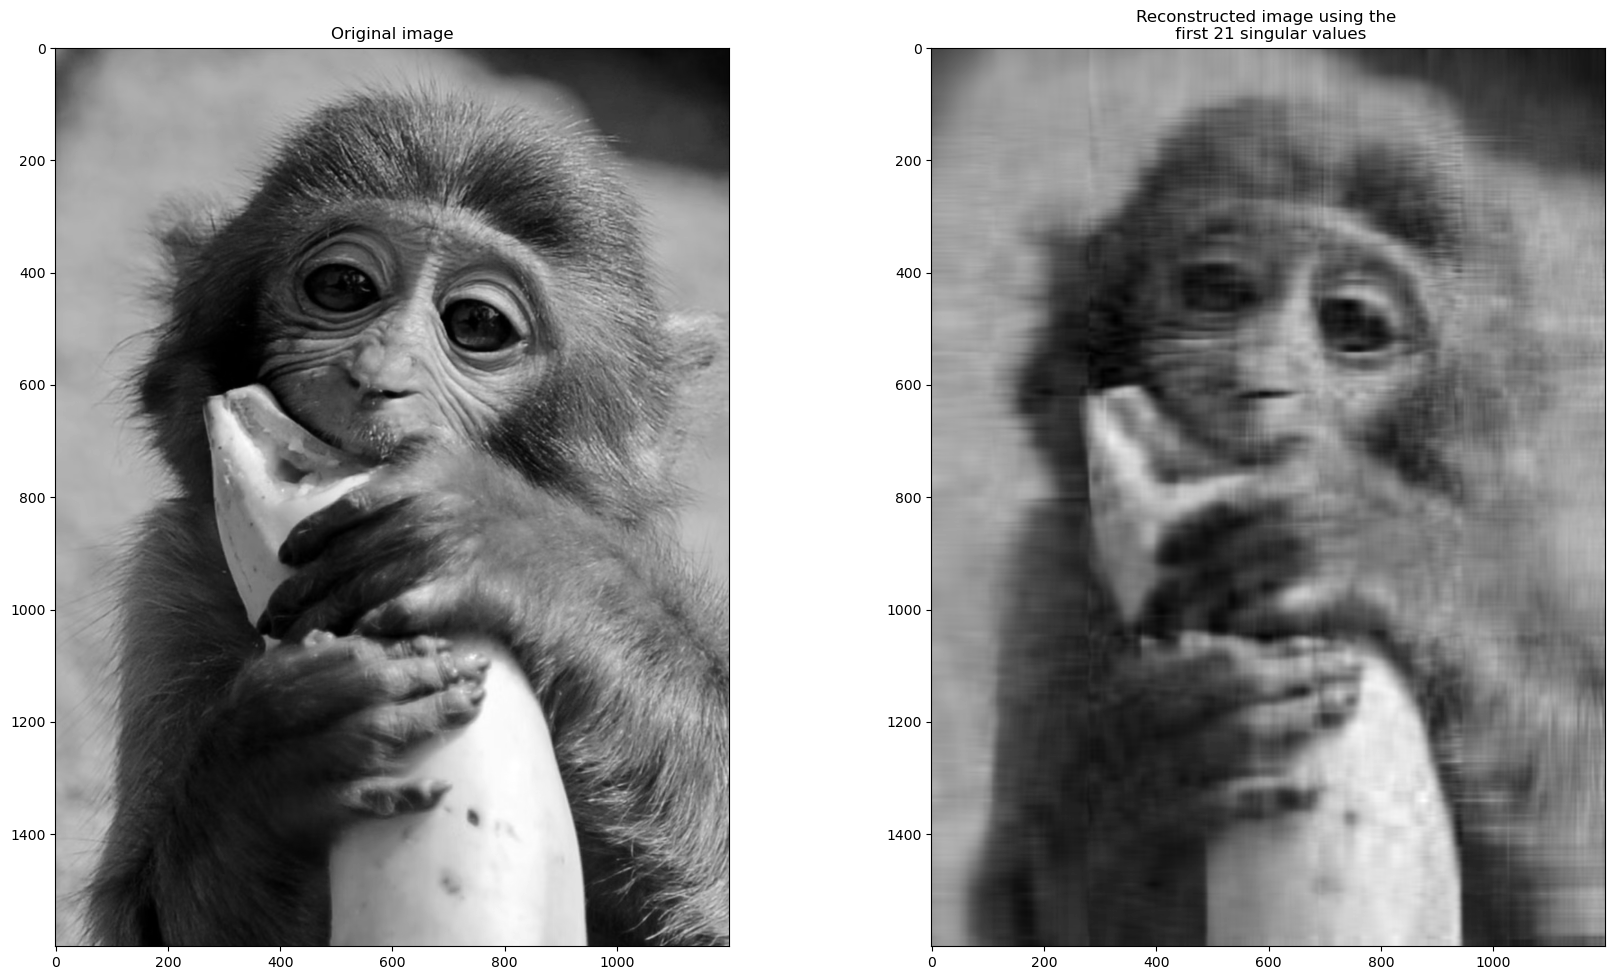

In [80]:
approximation = 1920000*0.03
print (approximation)

k = 21     # guessed and checked until we found around 3%
M_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

print('Rank approximation using 3% of original information = ', np.linalg.matrix_rank(M_approx))
print(' ')
print('original matrix: 1600 X 1200 = ', x*y, ' entries.')
print('using first ', k, ' singular values:', k*(1 + x + y), ' entries.')
percentage = (k*(1 + x + y))/(x*y)
print('Percentage of orgininal information: ',percentage*100, '%', sep='')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(M, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(M_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()